# Customers satisfaction and churn

We are an analyst in Cellular Company and we were provided with the customers database which should be  analyzed to gain insights into customer behavior and preferences, which helped the company to improve its services and retain customers. With this data we are going to find patterns and factors of churn  in order to find the ways how to flight it and improve customer service.

## Purposes of the analysis

- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
    - Identify target groups
    - Suggest measures to cut churn
    - Describe any other patterns with respect to interaction with customers

In this Notebook we will perform  churn analysis in and in the other one we will analyze customer satisfaction from the support team

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif

## Loading Data

In [2]:
# Load the data file
path = 'E://Израиль//Practicum//Battle//'

customers = pd.read_excel(path+'Customers Churn Rate.xlsx')

## Explore initial data

The `customers table` includes the following fields:

- UserID - User ID
- 'Gender' - User gender (Male or Female)
- SeniorCitizen - Whether the customer is a senior citizen or not (0 or 1)
- Status - Whether the customer has a partner or not (Yes or No)
- Dependents - Whether the customer has a dependents (Yes or No)
- LoyaltyPeriod - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service (Yes or No)
- MultipleLines - Whether the customer has a multiple lines (Yes, No, No service)
- InternetService - Customers Internet Provider (Fiber Optic, DSL, No)
- Security - Whether the customer has an on-line security (Yes, No, No Internet service)
- Backup - Whether the customer has a back up (Yes, No, No Internet service)
- Protection - Whether the customer has a protection (Yes, No, No Internet service)
- Support - Whether the customer has a tech support (Yes, No, No Internet service)
- StreamingTV - Whether the customer has a streaming TV (Yes, No, No Internet service)
- StreamingMovies - Whether the customer has a streaming movies (Yes, No, No Internet service)
- ContractType - Type of the contract (Month-to-month, 1 year, 2 year)
- EmailBilling - Whether the customer has paperless billing (Yes or No)
- PaymentMethod - Customer's payment method (Electronic check, Mailed check, Bank transfer, (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - Total accumulated amount charged to the customer
- numAdminTickets - Total number of calls customer did to customer support (from 0 to 5)
- numTechTickets - Total number of calls customer did to tech support (from 0 to 9)
- Churn - Whether the customer churned or not (Yes or No)

In [3]:
# printing the general/summary information about customers
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserID           7043 non-null   object 
 1   Gender           7043 non-null   object 
 2   SeniorCitizen    7043 non-null   int64  
 3   Status           7043 non-null   object 
 4   Dependents       7043 non-null   object 
 5   LoyaltyPeriod    7043 non-null   int64  
 6   PhoneService     7043 non-null   object 
 7   MultipleLines    7043 non-null   object 
 8   InternetService  7043 non-null   object 
 9   Security         7043 non-null   object 
 10  Backup           7043 non-null   object 
 11  Protection       7043 non-null   object 
 12  Support          7043 non-null   object 
 13  StreamingTV      7043 non-null   object 
 14  StreamingMovies  7043 non-null   object 
 15  ContractType     7043 non-null   object 
 16  EmailBilling     7043 non-null   object 
 17  PaymentMethod 

In [4]:
# print a sample of data from customers
customers.head()

,UserID,Gender,SeniorCitizen,Status,Dependents,LoyaltyPeriod,PhoneService,MultipleLines,InternetService,Security,...,StreamingTV,StreamingMovies,ContractType,EmailBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [5]:
# print a sample of data from customers
customers.tail(5)

,UserID,Gender,SeniorCitizen,Status,Dependents,LoyaltyPeriod,PhoneService,MultipleLines,InternetService,Security,...,StreamingTV,StreamingMovies,ContractType,EmailBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,2,0,No


In [6]:
# print a sample of data from customers
customers.sample(5)

,UserID,Gender,SeniorCitizen,Status,Dependents,LoyaltyPeriod,PhoneService,MultipleLines,InternetService,Security,...,StreamingTV,StreamingMovies,ContractType,EmailBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
1455,1621-YNCJH,Female,0,Yes,No,36,Yes,Yes,Fiber optic,Yes,...,No,Yes,Two year,Yes,Credit card (automatic),106.05,3834.4,5,2,No
5451,1696-HXOWK,Female,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,One year,No,Mailed check,95.65,6856.95,0,0,No
4047,2434-EEVDB,Female,0,Yes,No,64,Yes,Yes,Fiber optic,Yes,...,Yes,No,Two year,Yes,Credit card (automatic),94.60,5948.7,0,0,No
2321,9776-OJUZI,Female,1,No,No,65,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Bank transfer (automatic),95.45,6223.3,0,0,No
5026,1401-FTHFQ,Male,0,Yes,Yes,23,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Credit card (automatic),20.00,445.3,0,0,No


## EDA

We have 7043 rows and 23 columns in our data. Most of the data is categorical or boolean but we have object type mostly. So we need to change the types of the columns in order to use them in our prediction models. The total charges column should be changed to float as well and we will change column names to lower case for more convenience. In some columns (MultipleLines, Security, Backup, Protection, Support, StreamingTV, StreamingMovies) we have 3 options: Yes, No, No Internet service. But actually no service means that the customers do not have such service. So, No and No service are basically the same. We will put 0 for No and No internet service options and 1 for Yes in order to simplify our analysis.  

So,  will do the following steps for the preprocessing stage:
1. check for duplicates
2. Change column names to the lower case
3. Change the columns: Status, Dependents, PhoneService, EmailBilling, Churn,  to numeric ( 0 for no option, 1 for yes option)
4. Change the columns: MultipleLines, Security, Backup, Protection, Support, StreamingTV, StreamingMovies to numeric: 0 for no or no service, 1 for yes option
5. Change the columns Gender, InternetService, ContractType,  PaymentMethod, to categorical
6. Change the column TotalCharges to float.

In [7]:
# Check for duplicates
customers.duplicated().sum()

0

In [8]:
# Change column names to the lower case
customers.columns = customers.columns.str.lower()

# Writeing the function which will change column types
def column_type(df):
    for col in df.columns:
        if (col == 'status' or col == 'dependents' or col=='phoneservice' or col== 'emailbilling' or col=='churn'):
            
            df[col] = df[col].map({'No': 0, 'Yes': 1})
        
        elif col=='multiplelines':
            df[col] = df[col].map({'No': 0, 'No phone service': 0, 'Yes': 1})
            
        elif (col=='security' or col=='backup' or col=='protection' or 
              col=='support' or col=='streamingtv' or col=='streamingmovies'):
            
            df[col] = df[col].map({'No': 0, 'No internet service': 0, 'Yes': 1})
            
        elif (col == 'gender' or col=='internetservice' or col=='contracttype' or col=='paymentmethod'):
            df[col] = df[col].astype('category')
                       
# Applying function to the customers table
column_type(customers)

# Check general info of the customers table
customers.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   userid           7043 non-null   object  
 1   gender           7043 non-null   category
 2   seniorcitizen    7043 non-null   int64   
 3   status           7043 non-null   int64   
 4   dependents       7043 non-null   int64   
 5   loyaltyperiod    7043 non-null   int64   
 6   phoneservice     7043 non-null   int64   
 7   multiplelines    7043 non-null   int64   
 8   internetservice  7043 non-null   category
 9   security         7043 non-null   int64   
 10  backup           7043 non-null   int64   
 11  protection       7043 non-null   int64   
 12  support          7043 non-null   int64   
 13  streamingtv      7043 non-null   int64   
 14  streamingmovies  7043 non-null   int64   
 15  contracttype     7043 non-null   category
 16  emailbilling     7043 non-null   int64   


We have no missing values and we have successfully changed almost all types of the columns. We have just one column `totalcharges` which is not a float type. Let's investigate it. May be there are some values which we not recognized as numbers. We can change all values which can not be recognized as numbers with NAN when changing the format of the column to numeric. Let's do this

In [9]:
# changing values to numeric and creating nan where we can not change ti numeric
customers['totalcharges'] = pd.to_numeric(customers['totalcharges'], errors='coerce')

# check the result
customers['totalcharges'].isna().sum()

11

We have 11 missing values. for Each missing total charges we have monthly charges and if we look to our table we can see that total charges equals monthly charges multiple by loyalty period. It is not the exact value, there could be some discounts but it is more or less the same, so we can treat them using this approach. Let's do this

In [10]:
# Treating missing values in customers table
customers['totalcharges'] = customers['totalcharges'].fillna(customers.monthlycharges*customers.loyaltyperiod)

# Check what was done
customers['totalcharges'].isna().sum()

0

In [11]:
# Check general info of the customers table
customers.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   userid           7043 non-null   object  
 1   gender           7043 non-null   category
 2   seniorcitizen    7043 non-null   int64   
 3   status           7043 non-null   int64   
 4   dependents       7043 non-null   int64   
 5   loyaltyperiod    7043 non-null   int64   
 6   phoneservice     7043 non-null   int64   
 7   multiplelines    7043 non-null   int64   
 8   internetservice  7043 non-null   category
 9   security         7043 non-null   int64   
 10  backup           7043 non-null   int64   
 11  protection       7043 non-null   int64   
 12  support          7043 non-null   int64   
 13  streamingtv      7043 non-null   int64   
 14  streamingmovies  7043 non-null   int64   
 15  contracttype     7043 non-null   category
 16  emailbilling     7043 non-null   int64   


We have successfully made the preprocessing stage of the project. We changed column names to lower case, changed column types to category or numeric on order to use them in our models, restored some values in totalcharges column. Now we can start the Analysis. 

Let's look at the distribution of the data. We will use describe method and then we will write a function for visualization. We will use it to look at the distribution of the whole data, and then we will divide our data into 2 parts depending on churn and we will compare features for those parts.

In [12]:
# applying describe method to the data 
customers.describe()

,seniorcitizen,status,dependents,loyaltyperiod,phoneservice,multiplelines,security,backup,protection,support,streamingtv,streamingmovies,emailbilling,monthlycharges,totalcharges,numadmintickets,numtechtickets,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,0.515689,0.419566,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.275299,1.250117,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,5.000000,9.000000,1.000000


In [13]:
# Creating features table to find the most common value for every feature
features = pd.DataFrame(columns=['factor', 'mode', 'share'])
feature_list = customers.columns.to_list()

# Finding the mode and its share for every feature.
for item in feature_list:
    value = customers[item].mode().values[0]

# Check whether the feature is string or numeric  
    if isinstance(value, str):
        query_value = f'"{value}"'
    else:
        query_value = value

# Finding the share    
    share = len(customers.query(f'{item} == {query_value}')) / len(customers)
    features = features.append({'factor': item, 'mode': value, 'share': share}, ignore_index=True)

# Deleting some rows with the features which are not representative
features = features.drop(features[(features['factor'] == 'userid') | 
                                  (features['factor'] == 'churn') | 
                                  (features['factor'] == 'monthlycharges') | 
                                  (features['factor'] == 'totalcharges') | 
                                  (features['factor'] == 'loyaltyperiod')].index, axis=0)

# Formatting share column
features['share'] = features['share'].map("{:.1%}".format)

# Printing the result
features

C:\Users\Александр\AppData\Local\Temp\ipykernel_34464\715768327.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append({'factor': item, 'mode': value, 'share': share}, ignore_index=True)
C:\Users\Александр\AppData\Local\Temp\ipykernel_34464\715768327.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append({'factor': item, 'mode': value, 'share': share}, ignore_index=True)
C:\Users\Александр\AppData\Local\Temp\ipykernel_34464\715768327.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append({'factor': item, 'mode': value, 'share': share}, ignore_index=True)
C:\Users\Александр\AppData\Local\Temp\ipykernel_34464\715768327.py:17: FutureWarning: The frame.a

,factor,mode,share
1,gender,Male,50.5%
2,seniorcitizen,0,83.8%
3,status,0,51.7%
4,dependents,0,70.0%
6,phoneservice,1,90.3%
7,multiplelines,0,57.8%
8,internetservice,Fiber optic,44.0%
9,security,0,71.3%
10,backup,0,65.5%
11,protection,0,65.6%


We have a profile of our customers. Most of them are not senior citizen, have no dependents. 55% of them have short contracts just on monthly basis, and less than 20% of them connect to our support team in order to solve their problems. Let's look at the distributions of the features 

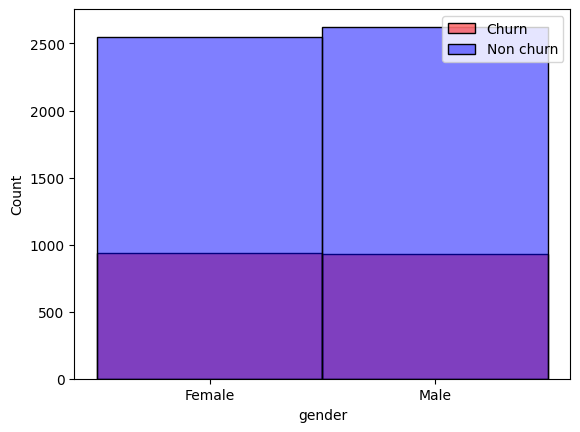

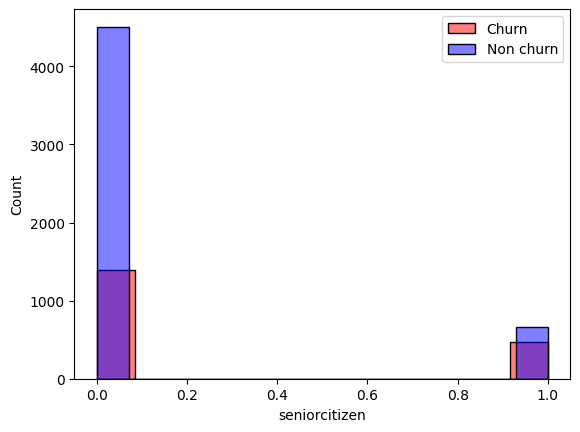

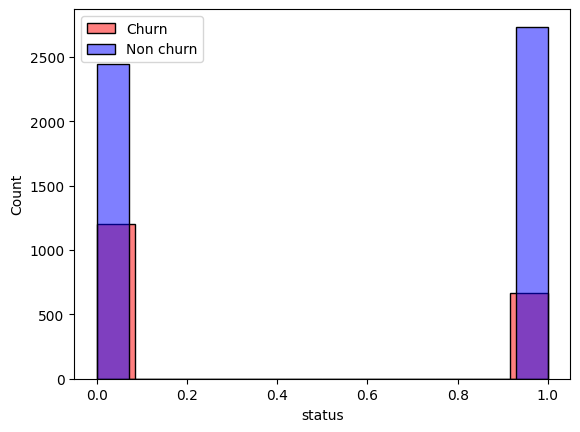

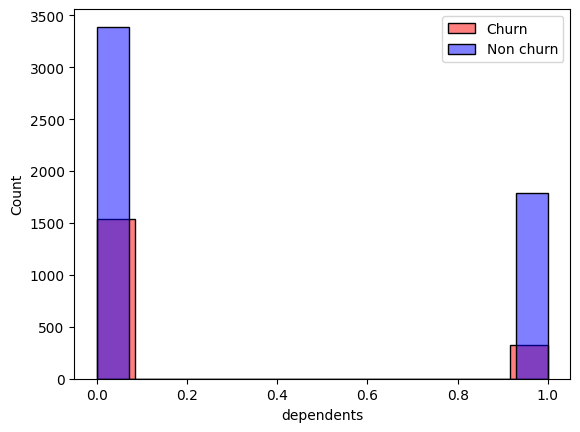

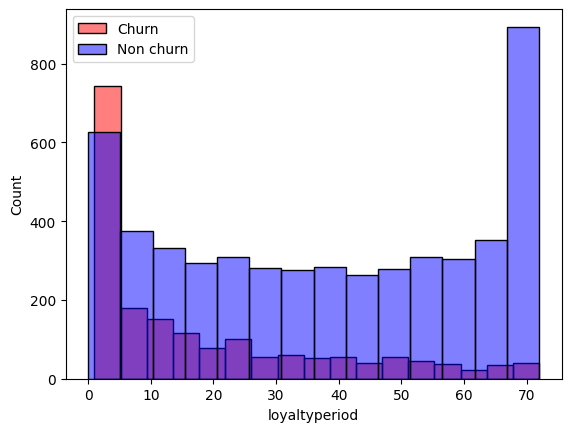

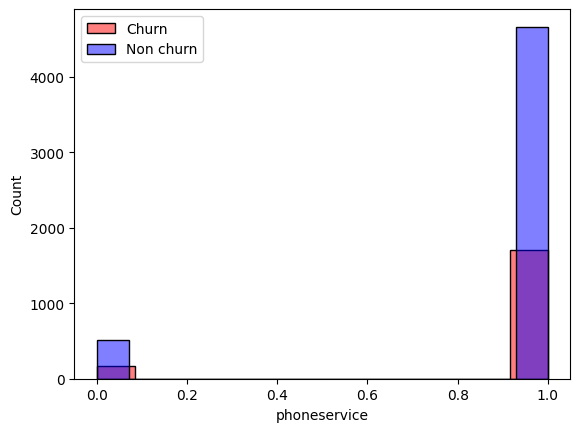

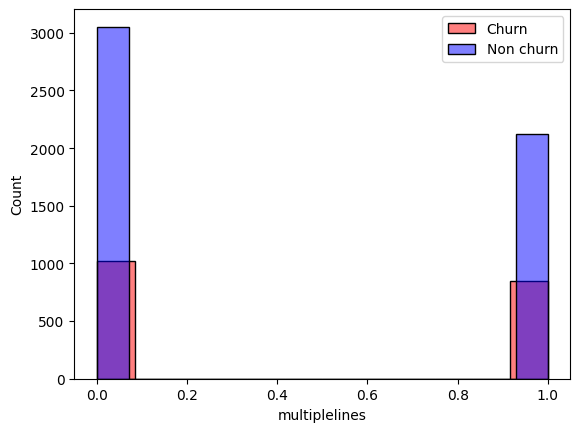

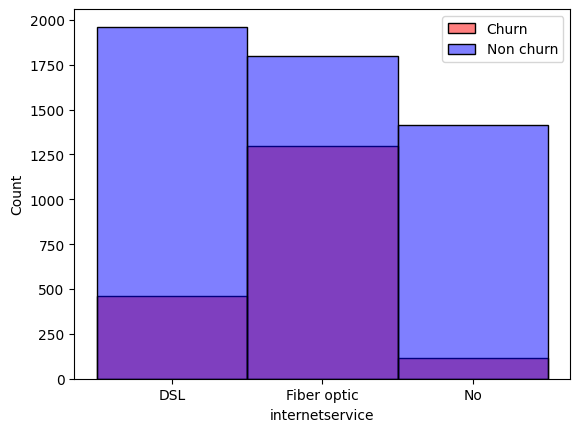

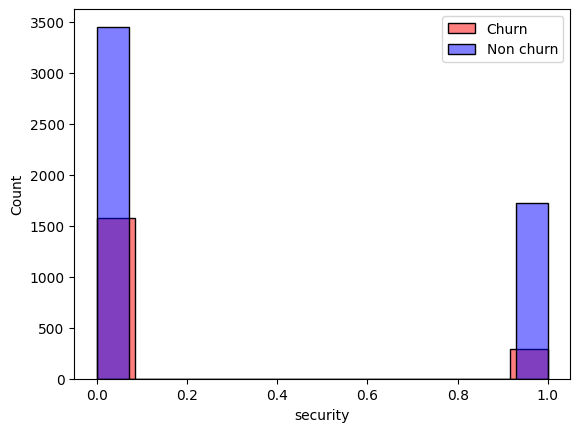

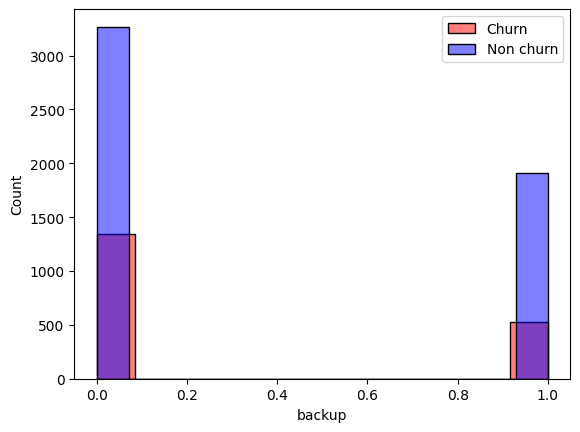

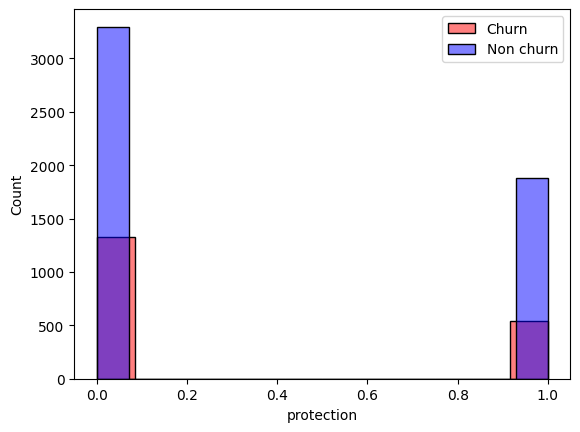

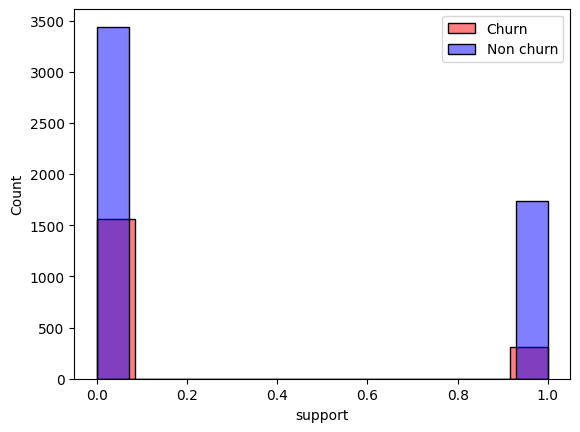

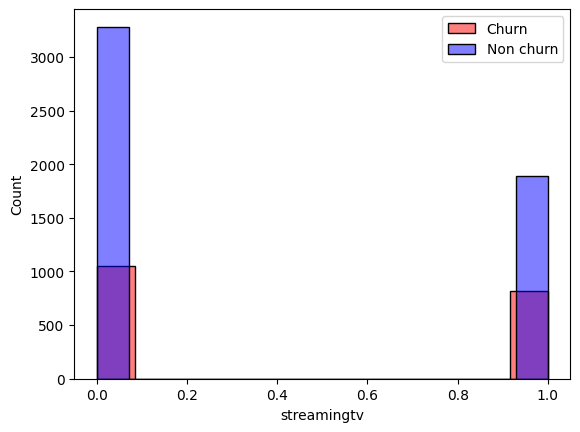

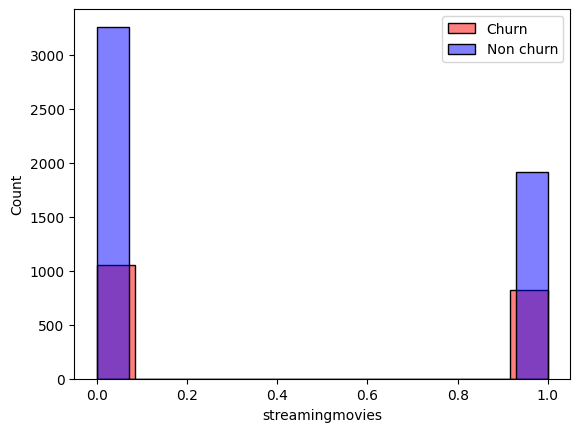

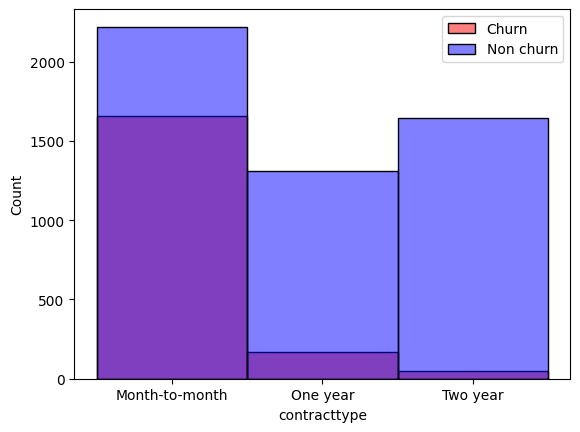

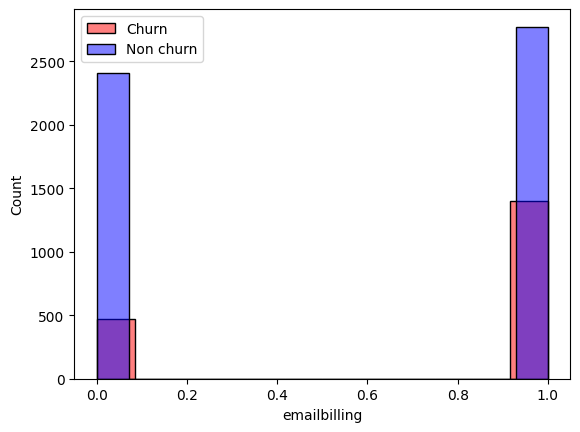

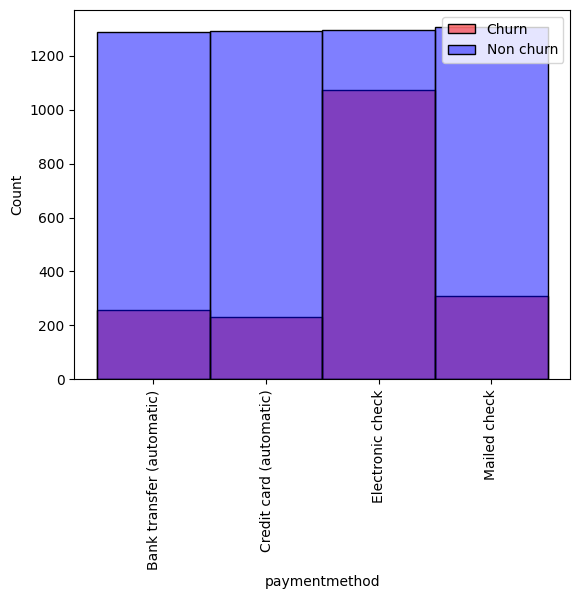

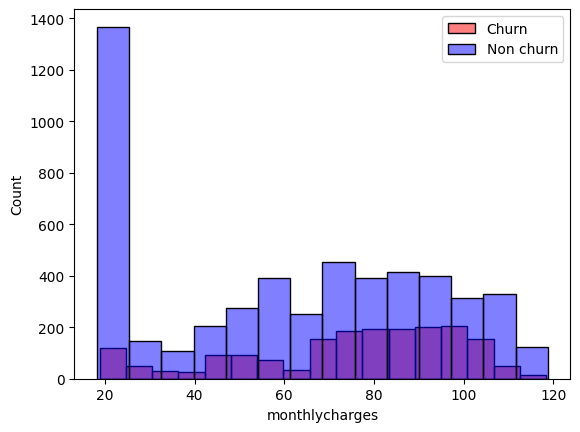

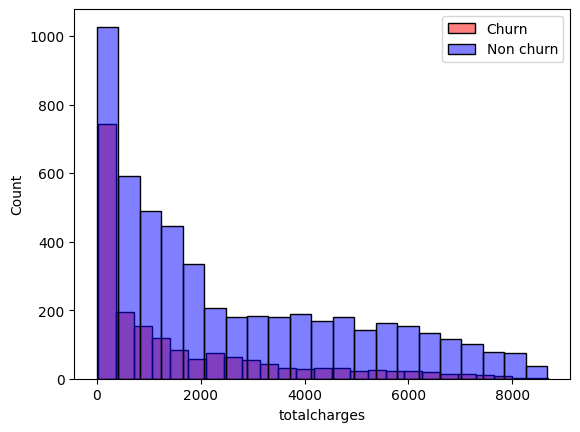

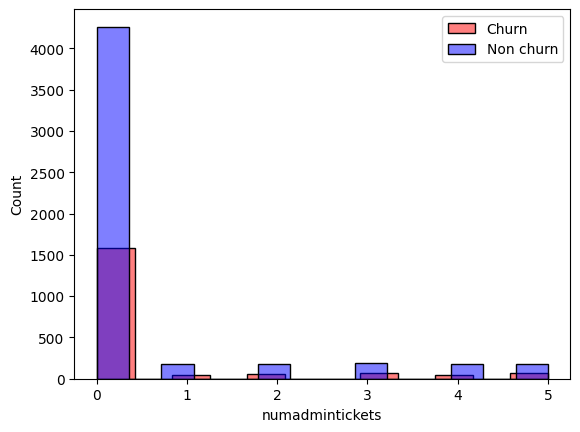

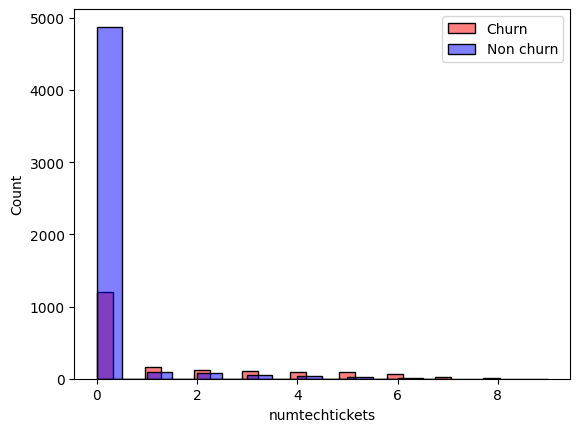

In [14]:
# Splitting the data into churn and non-churn customers
c_churn = customers.query('churn == 1').drop(['userid', 'churn'], axis=1)
c_nonchurn = customers.query('churn == 0').drop(['userid', 'churn'], axis=1)

# Defining a function for distribution of the features for different data frames
def distribution(df1, df2):
    for col in df1.columns:    
        if col != 'paymentmethod':
            sns.histplot(df1[col], color='red', alpha=0.5, label='Churn')
            sns.histplot(df2[col], color='blue', alpha=0.5, label='Non churn')
            plt.legend()
            plt.show()
        elif col == 'paymentmethod':
            sns.histplot(df1[col], color='red', alpha=0.5, label='Churn')
            sns.histplot(df2[col], color='blue', alpha=0.5, label='Non churn')
            plt.legend()
            plt.xticks(rotation=90)
            plt.show()

# Applying the function to the full Data Frame
distribution(c_churn, c_nonchurn)

We have 4 features where we can see almost equal distribution between churned and non churned customers. Gender distribution is almost 50% Male and 50% Female, 90% of customers have phone service and the distribution does not depend on churn factor, also total charges distribution looks almost equal between churned and non churned customers. And so does tickets distribution (admin and tech support) where the most of the customers don't need any help from the support team. We can exclude those features from our ML models.

Other features have a different distribution. 30% of the churned customers are senior citizens and for non churned customers that share is 15%. <br> 35% of churned customers and have a partner and for non churned customers this share is much bigger - 55%. <br> Only 15% of churned customers and 35% of non churned customers have dependents. <br> The majority of churned customers have a short loyalty period of one month, and just a very small part of them have long loyalty period. Although non churned customers have also a big share of short loyalty period, most of them have a long such period of 70 months. <br> The most of the churned customers have Fiber optic Internet provider and for non churned customers the distribution differs. Most of them have DSL, and pretty big part of them do not have any Internet provider. <br> Almost all of the churned customers do not have additional Internet services (InternetService itself, Security, Backup, Protection, Support, Streaming TV, Streaming Movies). For non churned customers there is almost equal share of those who have such service and for those who haven't. The same situation is for multiple lines. <br> Most of the churned customers have contract period of month to month basis. Although for non churned customers such share is also big, but the number of people who have contracts for 1 or 2 years is much bigger than for churned customers. <br> 75% of churned customers have e-mail billing and it is interesting that only 55% of non churned customers have it also. Most of churned customers have electronic check as payment method and for non churn customers there is equal distribution between all the methods. <br> And finally it is very interesting that although total charges distribution looks very similar for churned and non churned customers, the distribution of the monthly charges differs significantly. Most of the churned customers spend  80 - 100 USD, and the majority of non churned customers spend just 20 USD. So customers do not like to pay much money  

So according to our EDA analysis we will exclude 5 features for our ML models: gender, phone service, total charges, admin tickets, tech tickets. Then we will investigate the correlation between the different features, may be we need to exclude some of the interconnected features as well. 

Let's build a correlation matrix

In [15]:
# Building a correlation matrix
customers.corr()

,seniorcitizen,status,dependents,loyaltyperiod,phoneservice,multiplelines,security,backup,protection,support,streamingtv,streamingmovies,emailbilling,monthlycharges,totalcharges,numadmintickets,numtechtickets,churn
seniorcitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.103006,-0.000881,0.093330,0.150889
status,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,0.004595,0.090157,-0.150448
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.062078,0.005079,-0.020403,-0.164221
loyaltyperiod,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,-0.000440,0.215158,-0.352229
phoneservice,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,-0.007266,0.018107,0.011942
multiplelines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468504,0.001327,0.167087,0.040102
security,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.411651,0.009559,0.040917,-0.171226
backup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509226,0.003839,0.151233,-0.082255
protection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.521983,-0.007501,0.155147,-0.066160
support,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,0.338304,0.431883,0.013966,0.035640,-0.164674


We can see that loyalty period and total charges have correlation of 83%. It is strong and logical. The more time the customer will stay with us the more she pays, and we have already decided to exclude total charges from the model features because of almost equal distribution between churned and non churned customers. So we have one more reason for that. In the same time we have some categorical features and we can not analyze  correlation between them. Let's change some of them to numeric and analyze correlation between them. We will create a different table with categorical features. 

In [16]:
# Creating a copy of categorical features for the customers
c_cat = customers[['internetservice', 'contracttype', 'paymentmethod']]

#Writing the function to change values of the columns to numeric
def catnum(df):
    for col in df.columns:
        if col == 'internetservice':
            df[col] = df[col].map({'No': 0, 'Fiber optic': 1, 'DSL': 2})
            df[col] = df[col].astype(int)
        elif col == 'contracttype':
            df[col] = df[col].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
            df[col] = df[col].astype(int)
        elif col == 'paymentmethod':
            df[col] = df[col].map({'Electronic check': 0, 'Mailed check': 1, 
                                     'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
            df[col] = df[col].astype(int)            

# Applying the function to the table
catnum(c_cat)

#Checking the result
c_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   internetservice  7043 non-null   int32
 1   contracttype     7043 non-null   int32
 2   paymentmethod    7043 non-null   int32
dtypes: int32(3)
memory usage: 82.7 KB


C:\Users\Александр\AppData\Local\Temp\ipykernel_34464\485228539.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map({'No': 0, 'Fiber optic': 1, 'DSL': 2})
C:\Users\Александр\AppData\Local\Temp\ipykernel_34464\485228539.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int)
C:\Users\Александр\AppData\Local\Temp\ipykernel_34464\485228539.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

We have successfully created numeric  values of the categorical columns. Let's build a correlation matrix between the features

In [17]:
c_cat.corr()

,internetservice,contracttype,paymentmethod
internetservice,1.000000,-0.099721,-0.008124
contracttype,-0.099721,1.000000,0.358913
paymentmethod,-0.008124,0.358913,1.000000


We do not see any strong correlation there. 

So we will drop the following features: gender, phone service, total charges, admin tickets and tech tickets.

## Prediction model for customer churn

In order to build a prediction model we will perform the following steps:
- 1) Prepare the data by removing the columns which are not our features we have determined on the previous step.
- 2) Create X  (features) and Y  (churn) samples  
- 3) Split these data into train and test samples
- 4) Standardize data
- 5) Apply different ML algorithms
- 6) Analyze the key metrics of the models (accuracy,precision, recall, F1) and choose the best one
- 7) Analyze the importance of the features to find the most crucial features 
 
 Let's do this

In [18]:
#Prepare the data by removing the columns which are not the features of the future model
c_clean = customers.drop(['userid', 'gender', 'phoneservice', 'totalcharges', 'numadmintickets',
                         'numtechtickets'], axis=1)
c_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   seniorcitizen    7043 non-null   int64   
 1   status           7043 non-null   int64   
 2   dependents       7043 non-null   int64   
 3   loyaltyperiod    7043 non-null   int64   
 4   multiplelines    7043 non-null   int64   
 5   internetservice  7043 non-null   category
 6   security         7043 non-null   int64   
 7   backup           7043 non-null   int64   
 8   protection       7043 non-null   int64   
 9   support          7043 non-null   int64   
 10  streamingtv      7043 non-null   int64   
 11  streamingmovies  7043 non-null   int64   
 12  contracttype     7043 non-null   category
 13  emailbilling     7043 non-null   int64   
 14  paymentmethod    7043 non-null   category
 15  monthlycharges   7043 non-null   float64 
 16  churn            7043 non-null   int64   


We have 17 column in our clean DataFrame: 16 features and one target (churn). Let's do the steps we have described above. 

In [19]:
# Dividing the data into features (the X matrix) and a target variable (y)
X = c_clean.drop('churn', axis=1)
y = c_clean['churn']

# Divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Applying one-hot encoding to the categorical features on the training set
X_train_encoded = pd.get_dummies(X_train)

# Applying the same one-hot encoding on the test set using the columns from the training set
X_test_encoded = pd.get_dummies(X_test)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Creating a StandardScaler object and applying it to the train set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train_encoded)

# Applying standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test_encoded)

# Declare the list of models
models = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), 
         GaussianNB(), SVC(), XGBClassifier()]

# The function that takes the model and data as input and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f} F1: {:.2f} '.format(accuracy_score(y_test, y_pred), 
                                          precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                          f1_score(y_test, y_pred)))

# Loop that outputs metrics for each model
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression()
Accuracy: 0.79 Precision: 0.63 Recall: 0.51 F1: 0.56 
RandomForestClassifier()
Accuracy: 0.77 Precision: 0.57 Recall: 0.46 F1: 0.51 
GradientBoostingClassifier()
Accuracy: 0.78 Precision: 0.61 Recall: 0.50 F1: 0.55 
GaussianNB()
Accuracy: 0.73 Precision: 0.48 Recall: 0.74 F1: 0.59 
SVC()
Accuracy: 0.79 Precision: 0.64 Recall: 0.48 F1: 0.55 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
       

We see that the best accuracy has Logistic regression (79%). But the recall parameter is only 51%. So, there are almost 50% of the cases where this model can not recognize the churn positively. Gaussian Naive Bayes model has accuracy just 73%, but recall metric is much better - 74%. In  our case recall metric is the most important because we do not want to miss the churned clients. It is better to recognize some  non churned customers as churned than vice versa. So, those 2 models give us the best results.

Now, let's find out what features have more influence to the churn. We can plot diagram with the coefficients for Logistic regression model and we can usethe analysis of variance (ANOVA) to evaluate feature importance of  the Gaussian Naive Bayes model.

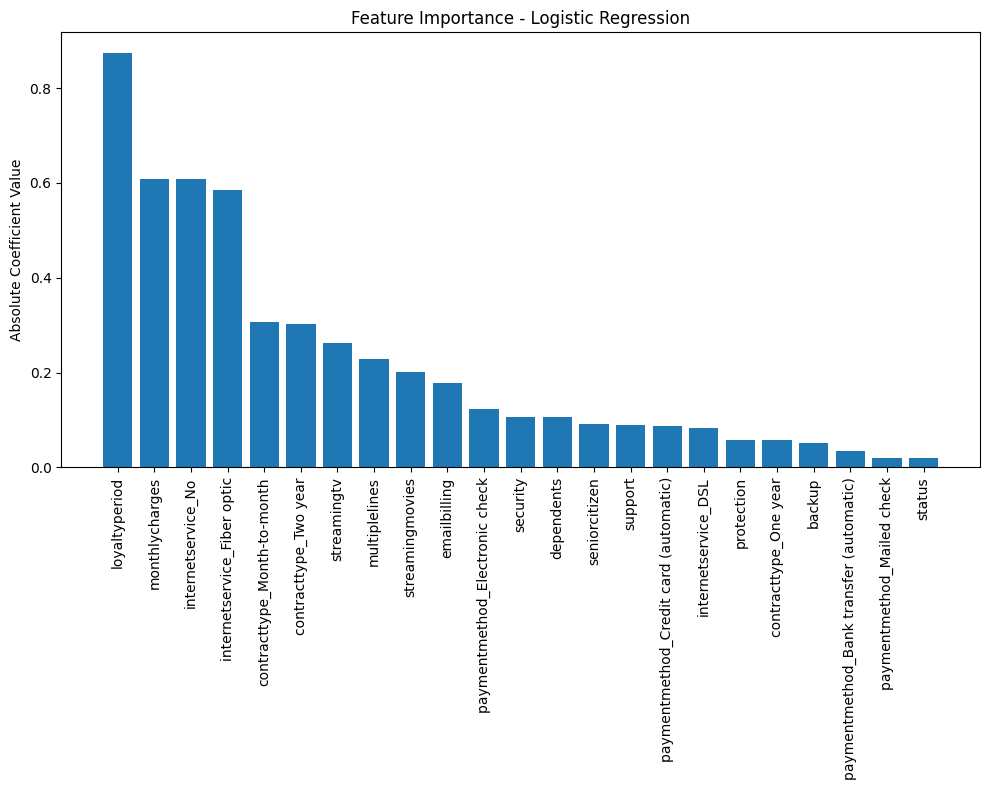

In [20]:
# Determine feature names
feature_names = X_train_encoded.columns

# Determine and fit the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_st, y_train)

# Finding modulus of the coefficients for each feature
coefficients = logreg.coef_[0]
coefficients_abs = np.abs(coefficients) 

# Building Series with feature names and coefficients 
coefficients_series = pd.Series(coefficients_abs, index=feature_names)

# Sorting the coefficients in descending order
coefficients_sorted = coefficients_series.sort_values(ascending=False)

# Plotting Bar Diagram
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(coefficients_sorted.index, coefficients_sorted)
ax.set_title("Feature Importance - Logistic Regression")
ax.set_ylabel("Absolute Coefficient Value")
ax.set_xticks(range(len(coefficients_sorted)))
ax.set_xticklabels(coefficients_sorted.index, rotation=90)
fig.tight_layout()
plt.show()


We see some most important features which influence to the churn. Loyalty period (the shorter the period the more risk of churn),  monthly charges (customers with less charges are less likely to churn), Internet service (Those who have Fiber are more likely to churn and those who have no service are less likely to churn).  It is interesting insight about Fiber Internet provider which is not obvious but that what data told us. Now Let's look at another model  Gaussian Naive Bayes. It is based on probabilities and on the assumption of feature independence, however, it is possible to estimate the feature importance for that model using the analysis of variance (ANOVA) method.

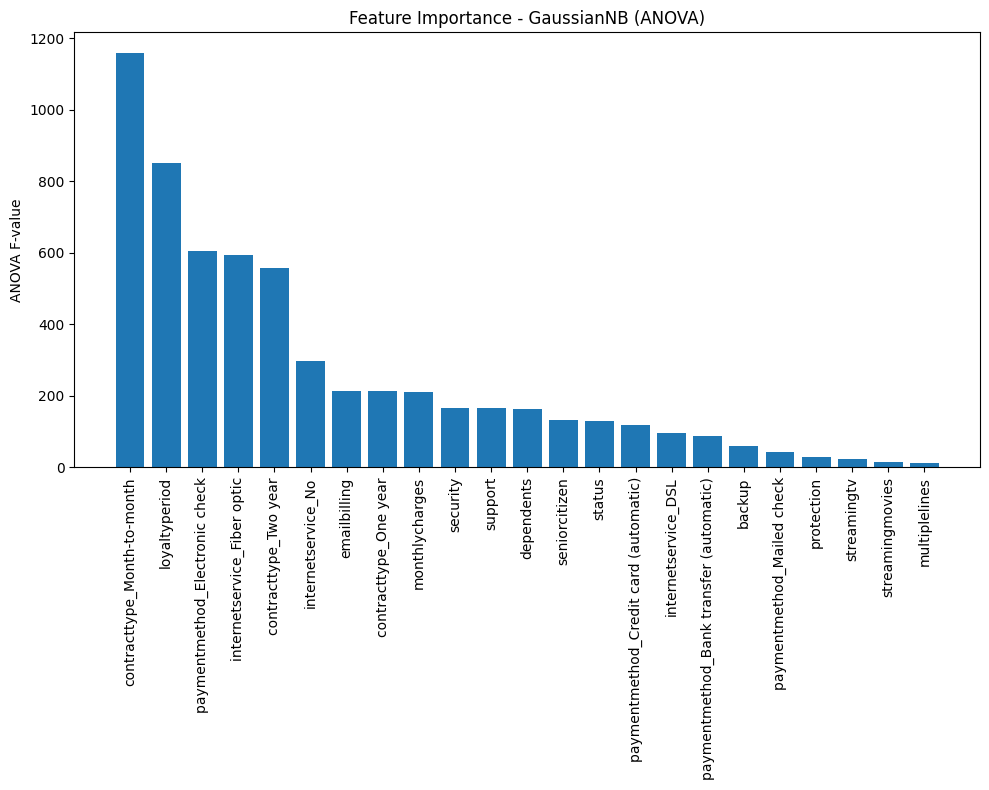

In [21]:
# Determine feature names
feature_names = X_train_encoded.columns

# Determine and fit the model
gnb = GaussianNB()
gnb.fit(X_train_st, y_train)

# Calculate ANOVA F-value and p-value for each feature
f_values, p_values = f_classif(X_train_st, y_train)

# Building Series with feature names and F-values
f_values_series = pd.Series(f_values, index=feature_names)

# Sorting the F-values in descending order
f_values_sorted = f_values_series.sort_values(ascending=False)

# Plotting Bar Diagram
fig, ax = plt.subplots(figsize=(10, 8))
plt.bar(f_values_sorted.index, f_values_sorted)
ax.set_title("Feature Importance - GaussianNB (ANOVA)")
ax.set_ylabel("ANOVA F-value")
ax.set_xticks(range(len(f_values_sorted)))
ax.set_xticklabels(f_values_sorted.index, rotation=90)
fig.tight_layout()
plt.show()

In that model we can see payment method as an important feature. Customers who have electronic check as payment method are more likely to churn. We see also that the most important factor is Contract type. Those who have short contracts on month to month basis are more likely to churn.

So we can see the profile of the customer who has high probability of churn: She has possibly new client with short period with us (1-2 months), her internet provider is Fiber, she has expensive contract with relatively big monthly charge about 70 USD and she has short contract for one month. It is important to note that we need to investigate the quality of Internet for Fiber provider, as most of the churned customers have that provider.

Now let's try to apply clustering and ML unsupervised algorithms to find some other insights or to confirm our conclusions 

## User clusters

Now, let's create user clusters. We will take our X features, standardize them, then we will build a matrix of distances based on the standardized feature matrix and plot a dendrogram. After that,  we will train the clustering model with the K-means algorithm and predict customer clusters. Finally we will plot distributions of features for the clusters and Calculate the churn rate for each cluster. 

let's  standardize X variable where we have already removed correlated features and plot a dendogram to evaluate the number of clusters that we can create.

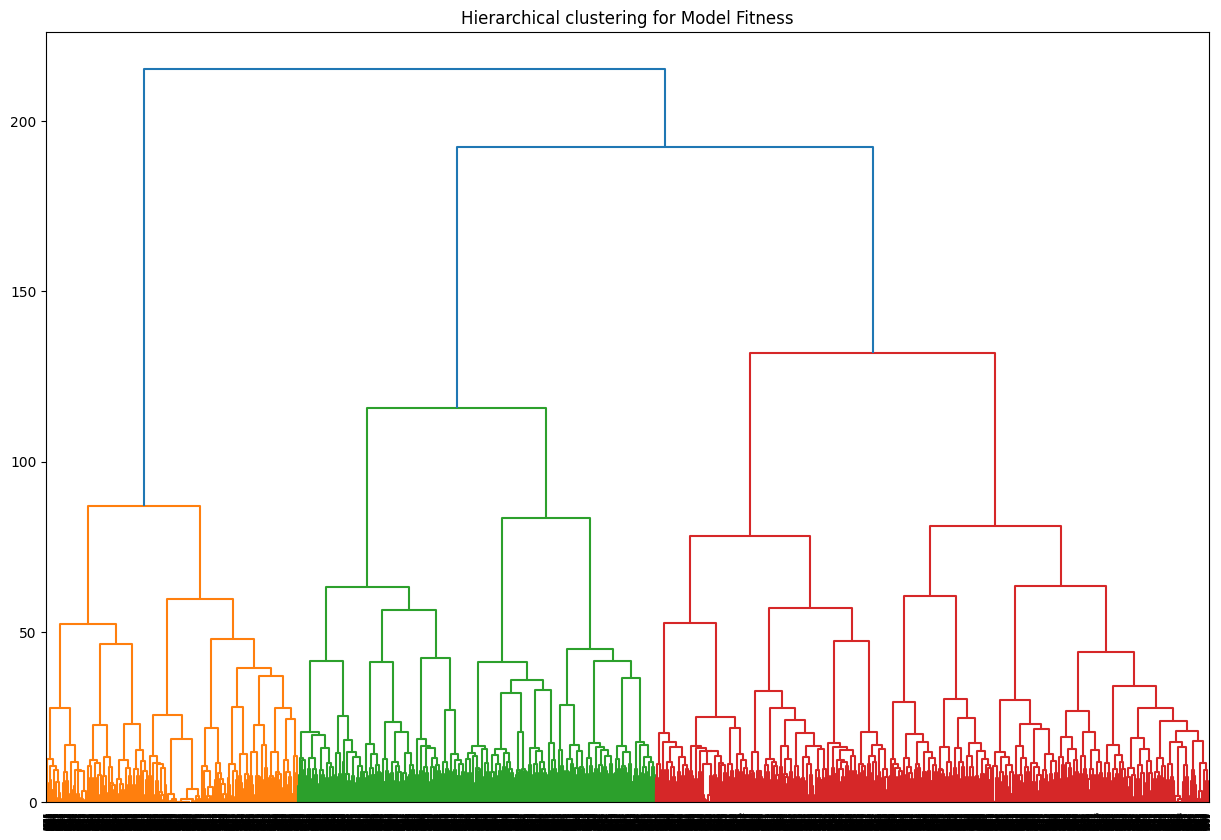

In [22]:
# Standardizing X (features)
X_encoded = pd.get_dummies(X)
X_sc = scaler.fit_transform(X_encoded)

# Building a matrix of distances
linked = linkage(X_sc, method = 'ward')

# Plotting a dendogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Model Fitness')
plt.show()

So according to the feature properties we can create 3 clusters. Let's find the clusters with KMeans and build a table with average features for every cluster.

In [23]:
# setting the number of clusters as 2
km = KMeans(n_clusters = 3)

# applying the algorithm to the data and forming a cluster vector
labels = km.fit_predict(X_sc)

# storing cluster labels in the field of our dataset
c_clean['cluster'] = labels

c_cluster = c_clean.groupby('cluster').mean()
c_cluster

,seniorcitizen,status,dependents,loyaltyperiod,multiplelines,security,backup,protection,support,streamingtv,streamingmovies,emailbilling,monthlycharges,churn
cluster,,,,,,,,,,,,,,
0,0.240833,0.346489,0.171224,18.201678,0.417029,0.191734,0.295525,0.265071,0.174643,0.371659,0.373213,0.723741,72.942138,0.475140
1,0.139752,0.678793,0.395297,54.057675,0.570098,0.617569,0.653949,0.694321,0.654392,0.669476,0.679237,0.616238,83.199933,0.099379
2,0.033100,0.481859,0.425207,30.280713,0.218969,0.006365,0.002546,0.002546,0.004456,0.001273,0.000000,0.288351,21.550700,0.073838


With the key means we can only analyze numerical features. We can see 2 clusters where we have just 7% - 10% of churned customers and 1 cluster where we have almsost 50% of churned customers. Here is the characteristics of the customers who are more likely to churn according to the clustering:
Customers who do not have dependents and who have short loyalty period are more likely to churn. We can not conclude that other factors have strong influence as we have very different values of the features in the clusters where there is a small number of churned customers. So, basically we did not get much additional information from that analysis. 

## General conclusion

We are an analyst in Cellular Company and we were provided with the customers database which should be  analyzed to gain insights into customer behavior and preferences, which helped the company to improve its services and retain customers. 

Purposes of the analysis were:
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service:
    - Identify target groups
    - Suggest measures to cut churn
    - Describe any other patterns with respect to interaction with customers

We got data of 7043 rows and 23 columns. There were no duplicates. We changed column names to lower case, changed column types to category or numeric on order to use them in our models, restored some values in totalcharges column.

During the EDA we found 4 features where we can see almost equal distribution between churned and non churned customers. Gender distribution is almost 50% Male and 50% Female, 90% of customers have phone service and the distribution does not depend on churn factor, also total charges distribution looks almost equal between churned and non churned customers. And so does tickets distribution (admin and tech support) where the most of the customers don't need any help from the support team. We can exclude those features from our ML models. Other features had a different distribution. 30% of the churned customers are senior citizens and for non churned customers that share is 15%. <br> 35% of churned customers and have a partner and for non churned customers this share is much bigger - 55%. <br> Only 15% of churned customers and 35% of non churned customers have dependents. <br> The majority of churned customers have a short loyalty period of one month, and just a very small part of them have long loyalty period. Although non churned customers have also a big share of short loyalty period, most of them have a long such period of 70 months. <br> The most of the churned customers have Fiber optic Internet provider and for non churned customers the distribution differs. Most of them have DSL, and pretty big part of them do not have any Internet provider. <br> Almost all of the churned customers do not have additional Internet services (InternetService itself, Security, Backup, Protection, Support, Streaming TV, Streaming Movies). For non churned customers there is almost equal share of those who have such service and for those who haven't. The same situation is for multiple lines. <br> Most of the churned customers have contract period of month to month basis. Although for non churned customers such share is also big, but the number of people who have contracts for 1 or 2 years is much bigger than for churned customers. <br> 75% of churned customers have e-mail billing and it is interesting that only 55% of non churned customers have it also. Most of churned customers have electronic check as payment method and for non churn customers there is equal distribution between all the methods. <br> And finally it is very interesting that although total charges distribution looks very similar for churned and non churned customers, the distribution of the monthly charges differs significantly. Most of the churned customers spend  80 - 100 USD, and the majority of non churned customers spend just 20 USD. So customers do not like to pay much money  

So according to our EDA analysis we excluded 5 features for our ML models: gender, phone service, total charges, admin tickets, tech tickets. After building correlation matrix between the features  **we decided to  drop 5 features in total from our model. they are: gender, phone service, total charges, admin tickets, tech tickets**

We trained different ML models to find the most important features that have influence to the customer churn. We saw that **the best accuracy had Logistic regression (79%). But the recall parameter is only 51%.** So, there are almost 50% of the cases where this model can not recognize the churn positively. **Gaussian Naive Bayes model has accuracy just 73%, but recall metric is much better - 74%.** In  our case recall metric is the most important because we do not want to miss the churned clients. It is better to recognize some  non churned customers as churned than vice versa. So,  that 2 models give us the  best results.
We found out the features that have more influence to the churn. We plotted diagram with the coefficients for Logistic regression model and we used analysis of variance (ANOVA) to evaluate feature importances for Gaussian Naive Bayes model.

We found out that Loyalty period **(the shorter the period the more risk of churn)**,  monthly charges **(customers with less charges are less likely to churn)**, Internet service **(Those who have Fiber are more likely to churn and those who have no service are less likely to churn)** are the crucial features. **It is interesting insight about Fiber Internet provider which is not obvious but that what data told us.**

Analyzing  **Gaussian Naive Bayes model** we discovered that  payment method as an important feature. **Customers who have electronic check as payment method are more likely to churn.** We saw also that the most important factor is Contract type. **Those who have short contracts on month to month basis are more likely to churn.**

So we can see **the profile of the customer who has high probability of churn: She has possibly new client with short period with us (1-2 months), her internet provider is Fiber, She has expensive contract with relatively big monthly charge about 70 USD and she has short contract for one month. It is important to note that we need to investigate the quality of Internet for Fiber provider, as most of the churned customers have that provider.

We have also divided customers into 3 clusters with the use of Kmeans in  order to find some more insights about the features that can influence to churn. We saw 2 clusters where we have just 7% - 10% of churned customers and 1 cluster where we have almsost 50% of churned customers. Here is the characteristics of the customers who are more likely to churn according to the clustering:
**Customers who do not have dependents and who have short loyalty period are more likely to churn.** We can not conclude that other factors have strong influence as we have very different values of the features in the clusters where there is a small number of churned customers. So, basically we did not get much additional information from that analysis. 

We can make some recommendations which help us to flight with churn:

1. Try to sign long contracts with the customers (for 1 or 2 years)
2. Try not to include many additional payments in the contracts so that monthly cost will stay at the level of 20 - 30 USD per month.
3. Implement some special proposals for new customers in order to decrease their probability of churn. New customers are much more likely to churn
4. Implement some bonuses for customers who do not chose electronic check as a billing option  

**And we should investigate the quality of the service for Fiber internet provider. The most of the churn customers had it. So, we have some problems here.**